# Investigate a DataSet : Titanic

I have made an attempt to analyze the [Titanic]('https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv') dataset hosted on [the Kaggle website]('https://www.kaggle.com/c/titanic/data').

The dataset contains classification on the basis of survival, fare, gender, family on board and many other criteria of knowledge of 891 passengers from the total 2224 passengers that were on board Titanic when the fatal disaster took place. It is my idea that analyzing this data could provide us with an in-depth knowledge of how human psychology works at a time of chaos and actions that people take when in an unforeseen situation with no formal training and guided only by their survival instincts.


<img src="files/titanic.jpg">


### Questions posed about the dataset

Some of the questions that crossed my mind regarding the dataset provided are as follows:- 

1. What proportion of total population on board survived ? What proportion of survived population were males and females?
   [ We know that so many lives were lost during this horrific incident but does this sample of total population of 2224          passengers show similarity to actual figures, and although the initial priority was given to women and children but how        many women actually survived as compaired to men survived ? ]   

2. What proportion of total males and females survived ?
   [ Were there more females rescued or men rescued from the total population aboard the Titanic ? ]

3. What percentage of Class 1, Class 2, Class 3 passengers survived ?
   [Was Class 1 given some kind of high priority as compaired to other classes or was everyone treated equally ?]

4. What proportion of Class 1 males and females survived ? How does it compare to Class 2 and Class 3 males and females ?
   [If classes were given any priority than, were both males and females of higher class saved first ?]

5. What was the maximum difference in the fares ? How many people with fares above the mean fares survived ?
   [Did higher fare actually gave people more priority during chaos ? and what was the maximum difference in fares as the        difference of approximatly 10 times is visible already ?]

6. Were there any survivors with no siblings, spouses, parents, or children ?
   [These people were most probably alone on the ship and no one would have cared for them much at the time the ship was          sinking.]

7. How many passengers had siblings or spouses or parents or children on board ? How many of them survived ?
   [Does a passenger with a family has more or less chances of survival at the time of crisis ?]

8. How many of the passengers that boarded the train from last port(Queenstown port) survived ? Compare that proportion to          passengers survived from other ports ?
   [Were the passengers that boarded from the last port more active than other passengers ?, It is my assumption that many        times passengers take time to get more comfortable with their means of transport and once they do they tend to get more        relaxed during the duration of journey.]  
   
9. Plot a graph showing different ages of people who survived. 
   [Younger people often have more chances of survival. ]

Now in order to answer these question to the utmost accuracy we do need to manipulated or rather play with data to some extent and in order to ease out whole of this process we will be importing the numpy, pandas and some other important library as the first step. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Note:- 
```python
%matplotlib inline      #plots that we make are displayed in this notebook itself and not in another notebook.
import seaborn as sns   #seaborn automatically increases the aesthetic portion of the graph.
```      


Reading data from the csv file in a pandas dataframe to start our computations.

In [2]:
titanic_df=pd.read_csv('titanic-data.csv')
titanic_df.head() #to make sure data has been read properly

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Data Cleaning

As observable from the header itself, many column contain NAN / missing values which might be a problem once we start exploring our dataset to answer questions, these values will also limit us from using histograms and other plots for representing data. Therefore, to avoid all such kind of problems ahead in our analysis, we either won't be using such columns or if they can prove helpful to the analysis all the NaN values in the numeric data columns can be replaced by 0 or we can delete rows with missing data. For this we will first check if a column containg a NaN value and if it does we have options either to change it to zero or delete that row or the column itself.


In [3]:
titanic_df.isnull().any() #This tells us wwhich of the column contain NaN values, so these are the column we need to focus on.


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

So, now we know Age, Cabin, and Embarked column contain NaN values. Turning our focus towards Cabin column first, we can delete this column as we won't be needing this in our analysis.


In [4]:
del titanic_df['Cabin']
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

Now we are left with Embarked and Age column, let us see how many rows have NaN values in Embarked

In [5]:
Embarked_nan=titanic_df[titanic_df['Embarked'].isnull() == True] #since there are just 2 rows we can delete them from the data set.
print Embarked_nan
titanic_df.drop(Embarked_nan.index,inplace=True)  #inplace=True to ensure stability and order in dataset.
len(titanic_df)       #now that we have droped 2 rows from our data set, our data's length has changed.

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN  


889

Now to clean Age column, we will fill NaN values with 0.

In [6]:
titanic_df['Age'].fillna(0)
titanic_df.isnull().any() #to recheck if any NaN values are left in the dataframe.


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

Now that we have successfully cleaned our dataset, we can begin exploring and finding answers to all the questions above.


### Data Exploring


__What proportion of total population on board survived ? What proportion of survived population were males and females?__

In order to answer this question we need to count the survivors out of all the passengers and group them on the bases of survival and gender.

In [8]:
survived=np.array(titanic_df['Survived'])             

#since each passenger who survived has 1 in survived column
#we can take sum of the survived column to find number of survivors    
total_survived=survived.sum()

print "{0} people survived from the given data about passengers.".format(total_survived)
survived_proportion=total_survived/float(len(titanic_df))
print "Proportion of total population that survived :-  {0}".format(survived_proportion)

340 people survived from the given data about passengers.
Proportion of total population that survived :-  0.382452193476


In [9]:
survived_df= titanic_df[titanic_df["Survived"] == 1]

#grouping the data of survived people interms of gender will sum up 
#the number of rows with gender as male and female seperatly 
#giving us the number of males and females that survival.
final_df=survived_df.groupby('Sex').sum()

print final_df
males=final_df.loc['male','Survived']/float(total_survived) 
females=final_df.loc['female','Survived']/float(total_survived) 
print "Proportion of survived population (males) :- {0}".format(males)
print "Proportion of survived population (females) :- {0}".format(females)

        PassengerId  Survived  Pclass      Age  SibSp  Parch        Fare
Sex                                                                     
female        99228       231     445  5583.00    120    120  11941.6876
male          51854       109     220  2536.67     42     39   4449.5418
Proportion of survived population (males) :- 0.320588235294
Proportion of survived population (females) :- 0.679411764706


And Hence, we know total population that survived was 340(0.38) people with 231(0.32) females and 109(0.68) males.

__What proportion of total males and females survived ?__

Now we know the number of males and females that survived, we need to know total nnumber of males and females on board.

In [10]:
male_female_df=titanic_df.groupby("Sex").size() # another way to calculate males and females, we can do it both ways
female_onboard=male_female_df['female']
male_onboard=male_female_df['male']
print male_female_df
print "Proportion of total males that survived {0}".format(final_df.loc['male','Survived']/float(male_onboard))
print "Proportion of total females that survived {0}".format(final_df.loc['female','Survived']/float(female_onboard))

Sex
female    312
male      577
dtype: int64
Proportion of total males that survived 0.188908145581
Proportion of total females that survived 0.740384615385


The statistics show that although there were significantly more men present on the titanic, but first preference was given to women on board as more than 74% women survived as compared to a mere 18% males. Although we were expecting a result that showed more women surviving as compared to men but these results show us how big was the difference.


__What percentage of Class 1, Class 2, Class 3 passengers survived ?__

We first need to find out how many passengers were there in each class, then calulate how many of them survived.

Survivors from class 1 : 62.6168224299 %
Survivors from class 2 : 47.2826086957 %
Survivors from class 3 : 24.2362525458 %


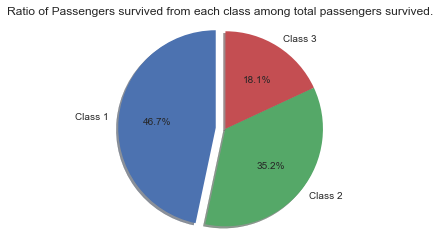

In [11]:
def survivor_class(i):
    class_1_total= titanic_df[titanic_df["Pclass"] == i]
    len_class1=len(class_1_total)
    class_1=class_1_total[class_1_total['Survived'] == 1]
    return ((len(class_1)/float(len_class1))*100)

class1_survivor_ratio=survivor_class(1) #class 1 survivor ratio
class2_survivor_ratio=survivor_class(2) #class 2 survivor ratio
class3_survivor_ratio=survivor_class(3) #class 3 survivor ratio

survive_percentage=pd.Series()
survive_percentage=[class1_survivor_ratio,class2_survivor_ratio,class3_survivor_ratio]

print 'Survivors from class 1 : {0} %'.format(class1_survivor_ratio)
print 'Survivors from class 2 : {0} %'.format(class2_survivor_ratio)
print 'Survivors from class 3 : {0} %'.format(class3_survivor_ratio)


# Pie chart, where the slices will be ordered and plotted to 
# show ratio of passengers survived 
# from each class among total passengers survived.

labels = 'Class 1', 'Class 2', 'Class 3'
sizes = [survivor_class(1),survivor_class(2),survivor_class(3)]
explode = (0.1, 0, 0)        # to put focus on the class

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Ratio of Passengers survived from each class among total passengers survived.')
plt.show()

As observalble class 1 passengers made highest proportion of survived passengers.

NameError: name 'pylab' is not defined

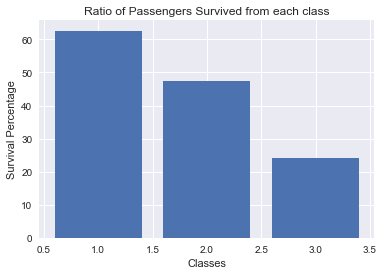

In [12]:
x = (1,2,3)
y = survive_percentage
bar_width = 0.4
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Classes')
plt.ylabel('Survival Percentage')
plt.title('Ratio of Passengers Survived from each class')
pylab.rcParams['figure.figsize'] = (6, 6)

plt.show()



As observable passengers were unfortunatly rescued in the order of there class with first preference given to the class 1 passengers 62% passengers surviving and only 24% passengers surviving from class 3. It will be intreasting to see how many of the rescued first class passengers were male. 

__What proportion of Class 1 males and females survived ? How does it compare to Class 2 and Class 3 males and females ?__


Males Survived 0.368852459016
Females Survived 0.967391304348
Males Survived 0.157407407407
Females Survived 0.921052631579
Males Survived 0.135446685879
Females Survived 0.5


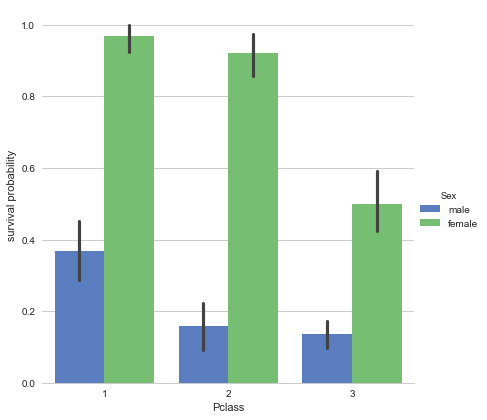

In [13]:
#The function below returns proportion of males and females that survived 
#from a given class by first filtering out data of a class then using 
#groupby for gender column.

def class_male_female_data(i):
    class_data= titanic_df[titanic_df["Pclass"] == i]
    data=class_data.groupby('Sex').agg({'Pclass':'count','Survived':'sum'})
    total_female=data.loc['female','Pclass']
    total_male=data.loc['male','Pclass']
    rescued_male=data.loc['male','Survived']    #this position in the dataframe return the males of class i that survived
    rescued_female=data.loc['female','Survived']
    print 'Males Survived {0}'.format(rescued_male/float(total_male))
    print 'Females Survived {0}'.format(rescued_female/float(total_female))
    
class_male_female_data(1)
class_male_female_data(2)
class_male_female_data(3)

# Let us compare using a nested barplot to show survival for class and sex

sns.set(style="whitegrid")
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
g.set_titles('Ratio of male to female survival in each class')

As we can see data variates to a significant extent with only 13.5% class 3 males surving as compared to 96.73% class 1 females.
Also, as expected both female and male surviving percentage drop with different class, but __We cannot guarentee that High Fare causes high probability of Survival, it is just a relation .__


__What was the maximum difference in the fares ? How many people with fares above the mean fares survived ?__

Just by looking at data we know that the difference is significant as first 2 rows have a difference of aproximatly 10 times.

Maximum difference in fares is 508.3167
Mean of the fares is 32.0966808774
Standard Deviation of the fares is 49.6975043167


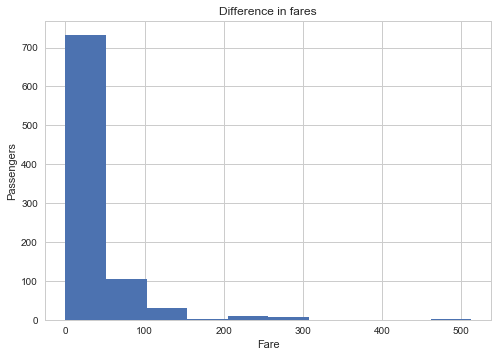

In [14]:
maxi=titanic_df['Fare'].max()
home=titanic_df['Fare']
mini=home[home != 0].min()      # I have choosen to ignore 0 as these might be crew members onboard.
titanic_df['Fare'].sort_values(inplace=False,ascending=True)
print 'Maximum difference in fares is {0}'.format(maxi-mini)
print 'Mean of the fares is {0}'.format(titanic_df['Fare'].mean())
print 'Standard Deviation of the fares is {0}'.format(titanic_df['Fare'].std())

titanic_df['Fare'].describe()
plt.hist(titanic_df['Fare'])
plt.title("Difference in fares")
plt.xlabel("Fare")
plt.ylabel("Passengers")


Looking at the plot we can say that our maximum currency is an outlier.

In [15]:
fares_above_mean=titanic_df[titanic_df['Fare'] >= titanic_df['Fare'].mean() ]   #people who paid above average
print 'Number of people who paid above average : {0}'.format(len(fares_above_mean))
print 'Number of people who paid above average for their ticket and survived : {0}'.format(len(fares_above_mean[fares_above_mean['Survived'] != 0]))

fares_above_mean=titanic_df[titanic_df['Fare'] <= titanic_df['Fare'].mean() ]   #people who paid below average
print 'Number of people who paid below average : {0}'.format(len(fares_above_mean))
print 'Number of people who paid below average for their ticket and survived : {0}'.format(len(fares_above_mean[fares_above_mean['Survived'] != 0]))


Number of people who paid above average : 209
Number of people who paid above average for their ticket and survived : 124
Number of people who paid below average : 680
Number of people who paid below average for their ticket and survived : 216


Therefore we can say that one has more probability of surviving if he pays above average for ticket. Although as the plot shows most of the passengers paid below 100 and our maximum currency is an outlier.


__Were there any survivors with no siblings, spouses, parents, or children ? __


In [16]:

no_sibsp=titanic_df[titanic_df['SibSp']==0]
alone_passengers=no_sibsp[no_sibsp['Parch']==0]
print 'Total Passengers travelling alone : {0}'.format(len(alone_passengers))
print 'Passengers that survived : {0}'.format(len(alone_passengers[alone_passengers['Survived'] == 1]))
print 'Probability of survival if travelling alone : {0}'.format(len(alone_passengers[alone_passengers['Survived'] == 1])/float(len(alone_passengers)))


#the functions defined below won't work in the case of 1 filter because here we have a filter of 2 columns, 
#so if we use function below we will have an error

Total Passengers travelling alone : 535
Passengers that survived : 161
Probability of survival if travelling alone : 0.300934579439


__How many of the passengers that boarded the train from last port(Queenstown port) survived ? Compare that proportion to          passengers survived from other ports ?__

In [17]:
def onboard_single_filter_notequal(df,data,value):
    filtered_data=df[df[data] != value ]
    filtered_total=len(filtered_data)
    filtered_survived=filtered_data[filtered_data['Survived'] == 1]
    print 'Probability of survival if travelling with {1} : {0}'.format(len(filtered_survived)/float(filtered_total),data)
    return filtered_survived

def onboard_single_filter_equal(df,data1,value):
    filtered_data=df[df[data1] == value ]
    filtered_total=len(filtered_data)
    filtered_survived=filtered_data[filtered_data['Survived'] == 1]
    print 'Probability of survival  {1}  {2} : {0}'.format(len(filtered_survived)/float(filtered_total),data1,value)
    return filtered_survived
# A drawback here is that above function are only available for numeric data.

survived_q=onboard_single_filter_equal(titanic_df,'Embarked','Q')
survived_s=onboard_single_filter_equal(titanic_df,'Embarked','S')
survived_c=onboard_single_filter_equal(titanic_df,'Embarked','C')


Probability of survival  Embarked  Q : 0.38961038961
Probability of survival  Embarked  S : 0.336956521739
Probability of survival  Embarked  C : 0.553571428571


<img src="files/titanic_route_copy.jpg">

Now we know that ship started from Southampton then reached Cherbourg and then Queenstown, but no recognizable relation can be seen here.


__How many passengers had siblings or spouses or parents or children on board ? How many of them survived ?__

In [18]:
def onboard_not_zero(df,data1,data2):
    filtered_data1=df[df[data1] != 0 ]
    filtered_data=filtered_data1[filtered_data1[data2] != 0]
    filtered_total=len(filtered_data)
    filtered_survived=filtered_data[filtered_data['Survived'] == 1]
    print 'Probability of survival if travelling with {1} and {2} : {0}'.format(len(filtered_survived)/float(filtered_total),data1,data2)
    return filtered_survived
def onboard_zero(df,data1,data2):
    filtered_data1=df[df[data== 0 ]]
    filtered_data=filtered_data1[filtered_data1[data2]== 0]
    filtered_total=len(filtered_data)
    filtered_survived=filtered_data[filtered_data['Survived'] == 1]
    print 'Probability of survival if travelling without {1} and {2} : {0}'.format(len(filtered_survived)/float(filtered_total),data1,data2)
    return filtered_survived

onboard_not_zero(titanic_df,'SibSp','Parch').head()


Probability of survival if travelling with SibSp and Parch : 0.43661971831


PassengerId  Survived  Pclass  \
10           11         1       3   
25           26         1       3   
43           44         1       2   
58           59         1       2   
65           66         1       3   

                                                 Name     Sex   Age  SibSp  \
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
43           Laroche, Miss. Simonne Marie Anne Andree  female   3.0      1   
58                       West, Miss. Constance Mirium  female   5.0      1   
65                           Moubarek, Master. Gerios    male   NaN      1   

    Parch         Ticket     Fare Embarked  
10      1        PP 9549  16.7000        S  
25      5         347077  31.3875        S  
43      2  SC/Paris 2123  41.5792        C  
58      2     C.A. 34651  27.7500        S  
65      1           2661  15.2458        C


__Plot a graph showing different ages of people who survived .__


count    288.000000
mean      28.193299
std       14.859146
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


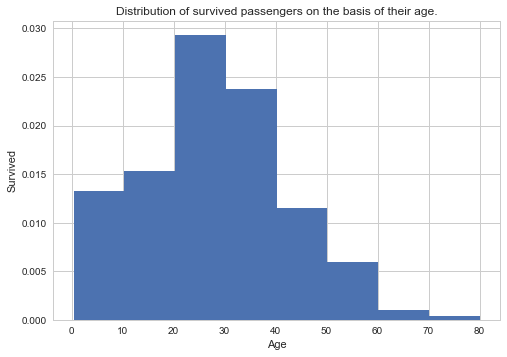

In [19]:
filtered_data=titanic_df[['Age','Survived']]
filtered_survived=filtered_data[filtered_data['Survived'] == 1]
print filtered_survived['Age'].describe()

filtered_survived['Age'].hist(normed=True,bins=8)

plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Distribution of survived passengers on the basis of their age.')


As you can see most of the ages lie in between 20 and 30 when a person is at their best possible fitness level, there are more people below the mean then above the mean because first preference was given to women and children.

### Limitations
Some of the limitations that I faced with dataset ware the unavailability of family groups, missing data values in Age column and no record of financial losses that might have occurred, data set was limited to human lives lost at sea and economical, infrastructural and weather data could have provided some interesting findings.

While doing my research, I found that at the time of collision ship was travelling at a speed of more than 20 knots and weather was not suitable for such a speed. Also, people with cabins near the safe boats might have had more chances of surviving, but that direction could not be explored due to missing values.

### Conclusion
Therefore, after going through all the results we can confidently say that when Titanic was sinking first preference was indeed given to females travelling in first class and most of the third class males lost their lives at the sea. We did not find any significant difference in people travelling alone or with family but that might be because in this data we have also considered people travelling with friends and mistresses as alone, so no accurate predictions can be made about it. We also didn't find any correlation between port embarked from and surviving, but a higher fare did show high probability of survival, but __we cannot say that high fare will result into more chances of survival__ because it's just a relation and no particular causation could be derived with the available data, not untill outliers are removed.
Therefore, in conclusion we can say that there exists a relation between fare prices and survival and in gender and chances of survival. Weather data and Cabin data could be explored further with the data given to find some more interesting relations.


Resources used to analyse the data thoroughly are as follows :-

1. http://www.titanicstory.com/

2. http://www.modestoradiomuseum.org/titanic.html

3. https://www.kaggle.com/c/titanic/data

4. https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown